In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
import scipy.optimize as spo

In [143]:
# Intial Measurments (m)
lam = 632.8e-9 #wavelenth
k = ( 2 * np.pi ) / lam #wave number
r = 55e-7/2 
L = 0.01 #length
dL = 0.002 #Unc in length

In [144]:
def irad(a,x,k,I0, L):
    u = k * r * k / L
    q = jv(1, u)
    return ((2 * q / u)**2 ) * I0

def chi_sqr(real,guess,dy):
    di = real - guess  / dy 
    chi_2 = di**2
    return(chi_2)

 I0 is equal to 0.39456978482566774 and the corresponding x value is 0.001364
0.39436225554313137
χ² =  0.008728343706202853
χ² Reduced =  8.607834029785851e-06
I0 =  0.39456978482566774
a =  1.6800000000000015e-05 ± 0.02 a adjusted = 1.200000000000001e-06
dof =  1014


/var/folders/34/1gqkym5j2rb879qqc4w6jjs40000gn/T/ipykernel_67984/1985155919.py:35: RuntimeWarning: invalid value encountered in true_divide
  y = ((((2*jv(1,K))/(K))**2)*I0)
/var/folders/34/1gqkym5j2rb879qqc4w6jjs40000gn/T/ipykernel_67984/1985155919.py:40: RuntimeWarning: invalid value encountered in true_divide
  y1 = ((((2*jv(1,K))/(K))**2)*I0)


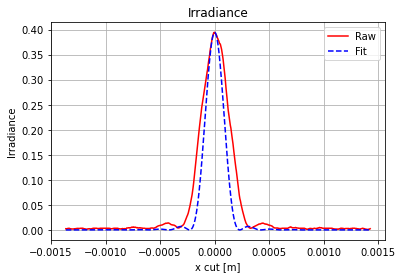

In [148]:
# Irradiance taken from an image cut at pixel 633
irradiance = np.genfromtxt('/Users/benjaminhogan/Optics Code/Chapter 4/Irradiance.txt')-.004
x = np.arange(len(irradiance))*r # Pixel Length

# Shifting the axis such that y max is centered at orgin
max_y = max(irradiance)  
max_x = x[irradiance.argmax()]  
x = x - max_x

# Another inital condition
I0 = max_y
print (f' I0 is equal to {max_y} and the corresponding x value is {max_x}')

dof = len(x) - 1 #setting the degrees of freedom
dn2 = 0.02   # uncertainty in the irradiance (Empirical)


# Aperture 
a = np.arange(15e-6, 17e-6, 1e-7)
#I0 = np.arange(0.5, .6, .01)

chi_2 = np.zeros(len(a))

for i in range(len(a)):
    function = irad(a,x,k,I0,L)
    chi_2[i] = (chi_sqr(function, irradiance[i], dn2 ))

chi_min = chi_2.min()
chi_reduced = chi_min / dof
index = np.unravel_index(np.argmin(chi_2),chi_2.shape)

a = a[int(index[0])]

K = (k*a*x)/L
y = ((((2*jv(1,K))/(K))**2)*I0)
print(max(y))


K = (k*15e-6*x)/L
y1 = ((((2*jv(1,K))/(K))**2)*I0)

plt.figure()
plt.plot(x, irradiance, label = "Raw", color = 'red')
plt.xlabel("x cut [m]")
plt.ylabel("Irradiance")
plt.title("Irradiance")    
plt.grid() # Plotting the original data
plt.plot(x, y, color = 'blue', label = 'Fit', linestyle='--')

plt.legend()
plt.savefig('Irradaince.png')

print('\u03C7\u00b2 = ', chi_min)
print('\u03C7\u00b2 Reduced = ', chi_reduced)
print('I0 = ', I0)
print('a = ', a, u"\u00B1", dn2, f"a adjusted = {a/14}")
print('dof = ', dof)

array([4.38086492e-09, 2.41046035e-07, 8.41415081e-07, ...,
       4.72295938e-05, 5.02614334e-05, 5.31521398e-05])